In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('/content/drive/MyDrive/machine learning/Ensemble Learning/RANDOM FOREST/kidney_disease.csv')

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.shape

(400, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
data.isnull().sum()*100/len(data)

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [7]:
data = data.drop(data[['rbc','wc','rc']],axis=1)

In [8]:
data.head()

,id,age,bp,sg,al,su,pc,pcc,ba,bgr,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,notpresent,notpresent,121.0,...,NaN,15.4,44,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,notpresent,notpresent,NaN,...,NaN,11.3,38,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,notpresent,notpresent,423.0,...,NaN,9.6,31,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,...,2.5,11.2,32,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,notpresent,notpresent,106.0,...,NaN,11.6,35,no,no,no,good,no,no,ckd


In [9]:
data = data.fillna(method='bfill')

In [10]:
data.isna().any()

id                False
age               False
bp                False
sg                False
al                False
su                False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    object 
 16  htn             400 non-null    object 
 17  dm              400 non-null    obj

In [ ]:
data['dm'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes'], dtype=object)

In [ ]:
data['cad'].unique()

array(['no', 'yes', '\tno'], dtype=object)

In [ ]:
data['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '16',
       '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52', '14',
       '22', '18', '42', '17', '46', '23', '19', '25', '41', '26', '15',
       '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [ ]:
data['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:
data['dm'] = data["dm"].replace({'yes': 'yes','\tno':'no','\tyes':'yes'})
data['dm'].unique()

array(['yes', 'no', ' yes'], dtype=object)

In [ ]:
data["cad"] = data["cad"].replace({'\tno':'no'})
data["cad"].unique()



array(['no', 'yes'], dtype=object)

In [ ]:
import numpy as np
from numpy import NAN
data["pcv"] = data["pcv"].replace({'\t43':'43','\t?':np.NAN})
data['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '16',
       '24', '37', '30', '34', '40', '45', '27', '48', nan, '52', '14',
       '22', '18', '42', '17', '46', '23', '19', '25', '41', '26', '15',
       '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [ ]:
data = data.fillna(method='bfill')

In [ ]:
data.isna().any()

id                False
age               False
bp                False
sg                False
al                False
su                False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    object 
 16  htn             400 non-null    object 
 17  dm              400 non-null    obj

In [ ]:
data["pcv"] = data["pcv"].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  htn             400 non-null    object 
 17  dm              400 non-null    obj

In [ ]:
lst = ['pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']
for i in lst:
  print(data[i].unique(),i)
  print('_______________________')

['normal' 'abnormal'] pc
_______________________
['notpresent' 'present'] pcc
_______________________
['notpresent' 'present'] ba
_______________________
['yes' 'no'] htn
_______________________
['yes' 'no' ' yes'] dm
_______________________
['no' 'yes'] cad
_______________________
['good' 'poor'] appet
_______________________
['no' 'yes'] pe
_______________________
['no' 'yes'] ane
_______________________
['ckd' 'ckd\t' 'notckd'] classification
_______________________


In [ ]:
data['classification'] = data['classification'].replace({'ckd\t':'ckd'})
data['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [ ]:
Data = pd.get_dummies(data,columns=['pc','pcc','ba','htn','dm','cad','appet','pe','ane'],drop_first=True)
Data

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pc_normal,pcc_present,ba_present,htn_yes,dm_no,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,111.0,...,True,False,False,True,False,True,False,False,False,False
1,1,7.0,50.0,1.020,4.0,0.0,423.0,18.0,0.8,111.0,...,True,False,False,False,True,False,False,False,False,False
2,2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,111.0,...,True,False,False,False,False,True,False,True,False,True
3,3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,...,False,True,False,True,True,False,False,True,True,True
4,4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,142.0,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,...,True,False,False,False,True,False,False,False,False,False
396,396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,...,True,False,False,False,True,False,False,False,False,False
397,397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,...,True,False,False,False,True,False,False,False,False,False
398,398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,...,True,False,False,False,True,False,False,False,False,False


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   bgr             400 non-null    float64
 7   bu              400 non-null    float64
 8   sc              400 non-null    float64
 9   sod             400 non-null    float64
 10  pot             400 non-null    float64
 11  hemo            400 non-null    float64
 12  pcv             400 non-null    float64
 13  classification  400 non-null    object 
 14  pc_normal       400 non-null    bool   
 15  pcc_present     400 non-null    bool   
 16  ba_present      400 non-null    bool   
 17  htn_yes         400 non-null    boo

In [ ]:
Data = Data.drop(['id'],axis=1)


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   bgr             400 non-null    float64
 6   bu              400 non-null    float64
 7   sc              400 non-null    float64
 8   sod             400 non-null    float64
 9   pot             400 non-null    float64
 10  hemo            400 non-null    float64
 11  pcv             400 non-null    float64
 12  classification  400 non-null    object 
 13  pc_normal       400 non-null    bool   
 14  pcc_present     400 non-null    bool   
 15  ba_present      400 non-null    bool   
 16  htn_yes         400 non-null    bool   
 17  dm_no           400 non-null    boo

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Data['classification'] = le.fit_transform(Data['classification'])

In [ ]:
x = Data.drop(['classification'],axis=1)
x.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_no,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,111.0,2.5,...,True,False,False,True,False,True,False,False,False,False
1,7.0,50.0,1.020,4.0,0.0,423.0,18.0,0.8,111.0,2.5,...,True,False,False,False,True,False,False,False,False,False
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,111.0,2.5,...,True,False,False,False,False,True,False,True,False,True
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,False,True,False,True,True,False,False,True,True,True
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,142.0,3.2,...,True,False,False,False,True,False,False,False,False,False


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   bgr             400 non-null    float64
 6   bu              400 non-null    float64
 7   sc              400 non-null    float64
 8   sod             400 non-null    float64
 9   pot             400 non-null    float64
 10  hemo            400 non-null    float64
 11  pcv             400 non-null    float64
 12  classification  400 non-null    int64  
 13  pc_normal       400 non-null    bool   
 14  pcc_present     400 non-null    bool   
 15  ba_present      400 non-null    bool   
 16  htn_yes         400 non-null    bool   
 17  dm_no           400 non-null    boo

In [ ]:
y = Data['classification']


In [ ]:
Data['classification'].unique()

array([0, 1])

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: classification, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=20 ,criterion='gini',max_depth=5,max_features=5)
rfc.fit(x_train,ytrain)
ypred = rfc.predict(xtest)
ypred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [ ]:
help(rfc)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [ ]:
training_score = rfc.score(x_train,ytrain)
training_score

1.0

In [ ]:
testing_score = rfc.score(xtest,ytest)
testing_score

1.0

In [ ]:
rfc.predict_proba(xtest)

array([[1.        , 0.        ],
       [0.00491928, 0.99508072],
       [0.05491928, 0.94508072],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00491928, 0.99508072],
       [1.        , 0.        ],
       [0.95084746, 0.04915254],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00375649, 0.99624351],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00375649, 0.99624351],
       [1.        , 0.        ],
       [0.95      , 0.05      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00375649, 0.99624351],
       [1.        , 0.        ],
       [0.00375649, 0.99624351],
       [1.        , 0.        ],
       [0.00375649, 0.99624351],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.00375649, 0.99624351],
       [0.8       , 0.2       ],
       [1.

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(ytest,ypred)
conf_mat

array([[52,  0],
       [ 0, 28]])

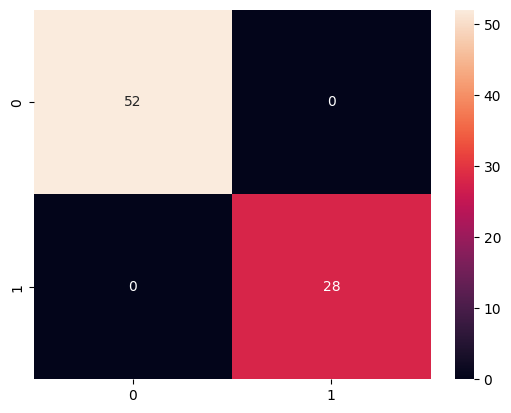

In [ ]:
import seaborn
import matplotlib.pyplot as plt
seaborn.heatmap(conf_mat, annot=True)
plt.show()

In [ ]:
rfc.predict([[2,3,5,1,2,3,5,3,2,3,4,1,5,2,3,4,5,1,2,3,2,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])